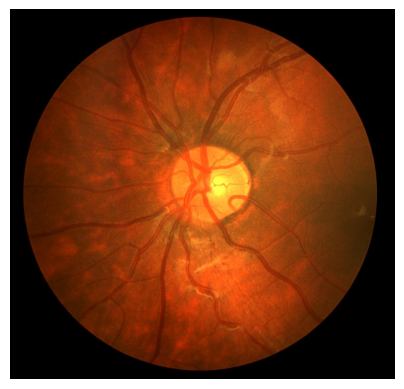

In [68]:
import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen
img_path = r"Image_01L.jpg"

# Leer y convertir la imagen
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


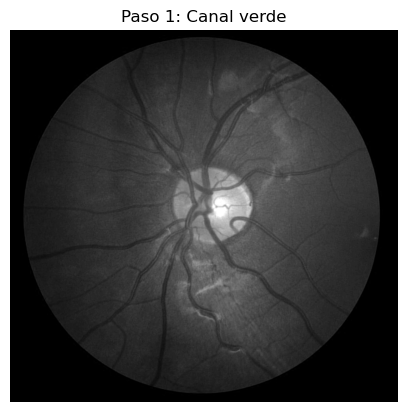

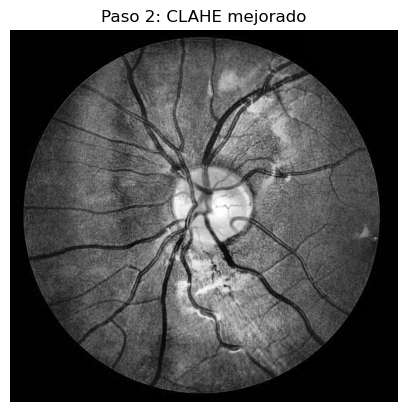

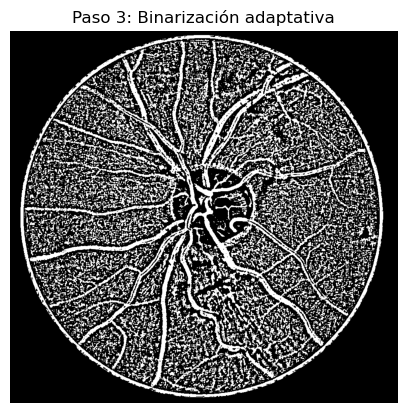

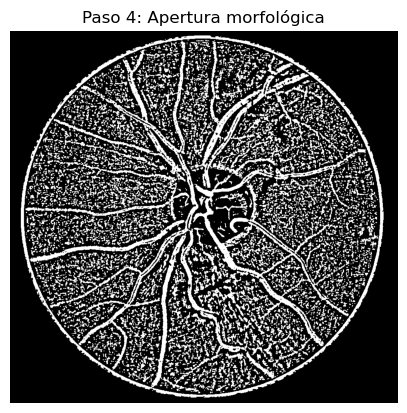

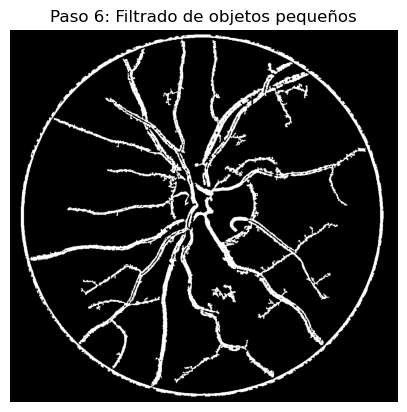

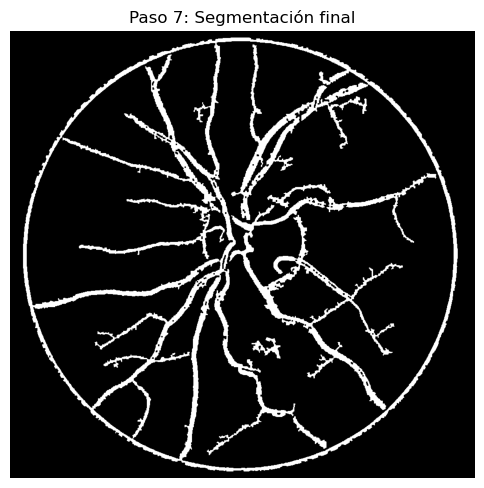

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_objects

# --- Paso 1: Leer imagen y canal verde ---
img = cv2.imread("Image_01L.jpg")
green = img[:, :, 1]
plt.figure(figsize=(5, 5))
plt.imshow(green, cmap='gray')
plt.title("Paso 1: Canal verde")
plt.axis('off')
plt.show()

# --- Paso 2: CLAHE con mayor realce ---
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
enhanced = clahe.apply(green)
plt.figure(figsize=(5, 5))
plt.imshow(enhanced, cmap='gray')
plt.title("Paso 2: CLAHE mejorado")
plt.axis('off')
plt.show()

# --- Paso 3: Binarización adaptativa con blockSize mayor ---
adaptive = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY_INV, blockSize=19, C=5)
plt.figure(figsize=(5, 5))
plt.imshow(adaptive, cmap='gray')
plt.title("Paso 3: Binarización adaptativa")
plt.axis('off')
plt.show()

# --- Paso 4: Apertura para eliminar ruido fino ---
opened = cv2.morphologyEx(adaptive, cv2.MORPH_OPEN, np.ones((2, 2), np.uint8), iterations=1)
plt.figure(figsize=(5, 5))
plt.imshow(opened, cmap='gray')
plt.title("Paso 4: Apertura morfológica")
plt.axis('off')
plt.show()

# --- Paso 5: Eliminar regiones pequeñas ---
mask_bool = opened.astype(bool)
filtered = remove_small_objects(mask_bool, min_size=500)
filtered_mask = (filtered * 255).astype(np.uint8)
plt.figure(figsize=(5, 5))
plt.imshow(filtered_mask, cmap='gray')
plt.title("Paso 6: Filtrado de objetos pequeños")
plt.axis('off')
plt.show()

# --- Paso 6: Cierre más fuerte para unir vasos fragmentados ---
final_mask = cv2.morphologyEx(filtered_mask, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8), iterations=1)
plt.figure(figsize=(6, 6))
plt.imshow(final_mask, cmap='gray')
plt.title("Paso 7: Segmentación final")
plt.axis("off")
plt.show()